In [1]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import neurokit2 as nk
from pyts.image import GramianAngularField
plt.style.use("science")
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["font.size"] = 20
fpath = "C:/Users/Marek/Desktop"

Text(0.5, 0, 'Čas (s)')

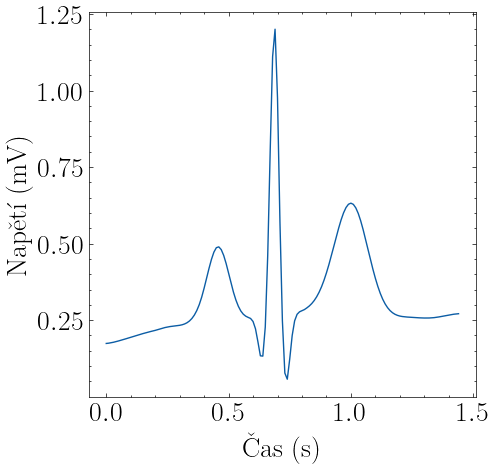

In [3]:
ecg = nk.ecg_simulate(duration=2, sampling_rate=100, heart_rate=50)
ecg = ecg[55:]
plt.plot(np.arange(0, len(ecg)) / 100, ecg)
plt.ylabel("Napětí (mV)")
plt.xlabel("Čas (s)")
# plt.axis("square")
# plt.savefig(f"{fpath}/ecg.png", format="png", bbox_inches="tight")

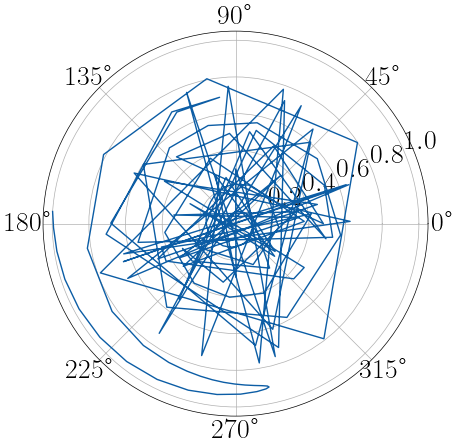

In [9]:
min_, max_ = np.amin(ecg), np.amax(ecg)
scaled_ecg = (2 * ecg - max_ - min_) / (max_ - min_)

# Floating point inaccuracy
scaled_ecg = np.where(scaled_ecg >= 1., 1., scaled_ecg)
scaled_ecg = np.where(scaled_ecg <= -1., -1., scaled_ecg)

# Polar encoding
phi = np.degrees(np.arccos(scaled_ecg))
r = np.linspace(0, 1, len(scaled_ecg))

ax = plt.axes(projection="polar")
plt.plot(phi, r)

# xT=plt.xticks()[0]
# xL=['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
# plt.xticks(xT, xL)
# cmap = plt.get_cmap('cool')
# plt.yticks([1, 2, 3, 4, 5, 6])
# ax.tick_params(axis='x', which='major', pad=12)
# plt.grid(True)
# plt.savefig(f"{fpath}/polar.png", format="png", bbox_inches="tight")

In [16]:
np.rad2deg(np.arccos(0))

90.0

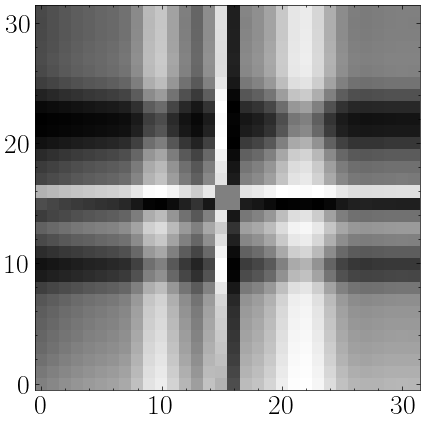

In [54]:
transformer = GramianAngularField(method="difference", image_size=32)
X_new = transformer.transform([ecg])
plt.imshow(X_new[0], cmap="gray", origin="lower")
plt.savefig(f"{fpath}/gaf.png", format="png", bbox_inches="tight")